# <font color="maroon">Chapter 3: A Basic NMR Analysis</font>

<a href="https://githubtocolab.com/alsinmr/pyDR_tutorial/blob/main/JupyterBook/Ch3_basic_NMR.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg"></a>

In this example, we load an NMR data set and demonstrate how to go about fitting it. For this, we need a text file with the measured relaxation rates and experimental data in it. This is provided for this example, but one can also upload ones own data. Make sure to follow the prescribed file format. Entries are separated by tabs within a given line and by carriage returns over multiple lines. Commented cell below may be uncommented to read out the example data file.

In [1]:
#Setup: Make sure packages are installed in google colab. 
#Also, make sure that we start in the main folder of the tutorial
import sys
import os
if 'google.colab' in sys.modules:
    !git clone https://github.com/alsinmr/pyDR_tutorial.git
    os.chdir('pyDR_tutorial')
    import colab_setup  #Installs the required packages for pyDR
else:
    os.chdir('..')
    sys.path.append('..') #Make sure pyDR is on your path if working locally

In [2]:
#Imports
import pyDR

In [3]:
# #Read-out data text file
# with open('data/HETs_15N.txt','r') as f:
#     for line in f:
#         print(line.strip())

In [4]:
data=pyDR.IO.readNMR('data/HETs_15N.txt')

First, we discuss the data object briefly to understand the contents of the data object. There are a few key components:
* Relaxation rate constants: **data.R**
* Standard deviation of the relaxation rate constants: **data.Rstd**
* Order parameters, given as $S^2$ (these are optional): **data.S2**
* Standard deviation of $S^2$: **data.S2std**
* Labels for the data: **data.label**
* Sensitivity of the data: **data.sens**
* Detector object for processing the data: **data.detect**
* Experimental parameters: **data.info**
    * This is a reference to data.sens.info
* Details on the data / processing so far: **data.details**
* Selection object, which connects data to a pdb of the molecular structure: **data.select**
    * Not required: we'll connect the data to a pdb later

A number of other functions and data objects are also attached to data, but these are for data processing, or analysis of the processing after an initial fit.

Below, you can investigate these different components. We show data.info, which provides the various relevant experimental parameters for determining the sensitivities of the 8 experiments. Note that this data set also includes $S^2$, which is treated separately and does not show up in data.info.

In [5]:
data.info

                   0           1           2           3           4           5           6           7
Type              R1          R1          R1         R1p         R1p         R1p         R1p         R1p
v0               400         500         850         850         850         850         500         500
v1               0.0         0.0         0.0        10.8        16.1        24.5        37.6        50.8
vr                 0           0           0          60          60          60          60          60
offset             0           0           0           0           0           0           0           0
stdev     0.00249149  0.00554449  0.00208680  1.08759999  0.65464997  0.68395000  0.56901997  1.18330001
med_val   0.04465600  0.03731900  0.02731099  3.81399989  3.52609992  3.61940002  3.92989993  5.97370004
Nuc              15N         15N         15N         15N         15N         15N         15N         15N
Nuc1              1H          1H          1H          1

The parameters found by default in data.info (can change if user provides their own sensitivity functions). Not all parameters are required for all experiments.
* v0: External magnetic field, given as the $^1$H frequency in MHz
* v1: Spin-locking strength for $R_{1\rho}$ experiments (applied to the relaxing nucleus), given in kHz
* vr: Magic angle spinning frequency, given in kHz
* offset: Offset applied to the spin-lock, given in kHz
* stdev: Median standard deviation for data set
* med_val: Median relaxation rate constant for data set
* Nuc: Nucleus being relaxed (atomic number, symbol)
* Nuc1: Nucleus (or list of nuclei) relaxing Nuc via dipole coupling
* dXY: Dipole coupling (or list of couplings), given in Hz Same length as Nuc1
    * Given as the full anisotropy of the dipole coupling, which is twice the coupling constant
* CSA: Chemical shift anisotropy of nucleus being relaxed (z-component in ppm)
* eta: Asymmetry of the CSA, which is unitless
* CSoff: Unimplemented
* QC: Quadrupole coupling in Hz
* etaQ: Asymmetry of the quadrupole coupling
* theta: Angle between the CSA and dipole couplings (for cross-correlated cross-relaxation)

A graphical summary of the data object is obtained via data.plot (can use various plotting options, such as plot type, etc.). The plt_obj provides a variety of functions for manipulating the plot.

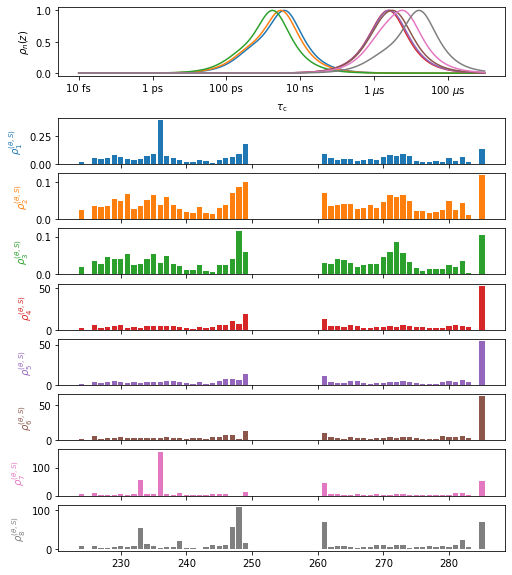

In [7]:
plt_obj=data.plot(style='bar')
plt_obj.fig.set_size_inches([8,10])